In [2]:
import seaborn as sns
from sklearn.utils import shuffle
Diamonds = shuffle(sns.load_dataset('diamonds'))

In [5]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import numpy as np

In [4]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [4]:
Diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
45543,0.51,Ideal,D,SI1,61.8,55.0,1687,5.18,5.14,3.19
30000,0.43,Ideal,E,SI2,61.9,57.0,716,4.83,4.86,3.00
8573,1.00,Very Good,E,SI1,63.1,58.0,4435,6.34,6.20,3.95
12564,1.06,Ideal,H,SI1,63.0,55.0,5278,6.49,6.44,4.08
15379,0.38,Very Good,I,VS1,60.1,60.0,606,4.66,4.72,2.82
...,...,...,...,...,...,...,...,...,...,...
23996,1.50,Very Good,G,VS2,62.1,57.0,12156,7.21,7.31,4.51
51118,0.70,Fair,G,VS2,65.3,57.0,2338,5.58,5.47,3.61
3472,0.76,Very Good,G,VVS2,61.5,59.0,3394,5.83,5.91,3.61
42326,0.41,Ideal,F,VVS1,60.9,56.0,1295,4.79,4.83,2.93


In [6]:
Diamonds['cut1'] = np.where(Diamonds['cut'] == "Fair", 1, np.where(Diamonds['cut'] == "Good", 2,np.where(Diamonds['cut'] == "Ideal", 3, np.where(Diamonds['cut'] == "Premium", 4, 5))))

In [8]:
Diamonds['color1'] = np.where(Diamonds['color'] == "F", 1, np.where(Diamonds['color'] == "H", 2,np.where(Diamonds['color'] == "E", 3, np.where(Diamonds['color'] == "G", 4, 5))))

In [12]:
Diamonds['clarity1'] = np.where(Diamonds['clarity'] == "VS2", 1, np.where(Diamonds['clarity'] == "VVS2", 2,np.where(Diamonds['clarity'] == "S12", 3, np.where(Diamonds['clarity'] == "SI1", 4, np.where(Diamonds['clarity'] == "VS1",5, 6)))))

In [13]:
Diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z,cut1,color1,clarity1
603,0.70,Premium,F,VS2,59.5,58.0,2838,5.85,5.75,3.45,4,1,1
47034,0.55,Ideal,F,VS2,61.1,57.0,1819,5.30,5.27,3.23,3,1,1
22361,0.31,Very Good,H,VS2,63.2,57.0,628,4.35,4.32,2.74,5,2,1
52560,0.70,Ideal,H,VVS2,61.5,56.0,2536,5.74,5.71,3.52,3,2,2
41923,0.50,Premium,E,SI2,60.1,60.0,1262,5.13,5.05,3.06,4,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49903,0.61,Very Good,E,SI1,63.9,54.0,2179,5.38,5.42,3.45,5,3,4
16135,1.01,Ideal,G,VS2,61.9,58.0,6449,6.37,6.43,3.96,3,4,1
51215,0.70,Ideal,G,SI1,62.2,56.0,2352,5.72,5.69,3.55,3,4,4
14163,1.20,Premium,H,SI1,62.1,55.0,5746,6.79,6.74,4.20,4,2,4


In [14]:
x = Diamonds[['cut1', 'color1', 'clarity1']]

In [15]:
y = Diamonds['price']

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .4, random_state=101)

In [17]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(32364, 3) (32364,)
(21576, 3) (21576,)


In [18]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [19]:
predictions = lm.predict(x_test)
predictions

array([4031.3127816 , 4003.49276517, 3885.61155257, ..., 4439.55552489,
       3601.85116879, 3574.40565379])

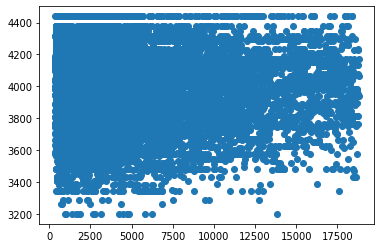

In [20]:
plt.scatter(y_test, predictions)

In [21]:
print("Score:", lm.score(x_test, y_test))

Score: 0.004353775153764228


In [22]:
kfold = KFold(5, True, 1)
for train, test in kfold.split(x,y):
    print('train: %s, test: %s' % (train,test))

TypeError: KFold.__init__() takes from 1 to 2 positional arguments but 4 were given